In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Cambiar el path *Importante
PATH_2210 = "E01_T_DEU_CONS_2210_REV.csv"
PATH_2211 = "E01_T_DEU_CONS_2211_REV.csv"
PATH_2212 = "E01_T_DEU_CONS_2212_REV.csv"
PATH_2301 = "E01_T_DEU_CONS_2301_REV.csv"
PATH_2302 = "E01_T_DEU_CONS_2302_REV.csv"
PATH_2303 = "E01_T_DEU_CONS_2303_REV.csv"

Cargar las bases

In [ ]:
#df2210 = pd.read_csv(PATH_2210, delimiter=";")
#df2211 = pd.read_csv(PATH_2211,delimiter=";")
#df2212 = pd.read_csv(PATH_2212,delimiter=";")
#df2301 = pd.read_csv(PATH_2301,delimiter=";")
#df2302 = pd.read_csv(PATH_2302,delimiter=";")
#df2303 = pd.read_csv(PATH_2303,delimiter=";")

Cargar las bases (Solo las personas)

In [2]:
df2210 = pd.read_csv(PATH_2210, delimiter=";", usecols = ['RUT'])
df2211 = pd.read_csv(PATH_2211, delimiter=";", usecols = ['RUT'])
df2212 = pd.read_csv(PATH_2212, delimiter=";", usecols = ['RUT'])
df2301 = pd.read_csv(PATH_2301, delimiter=";", usecols = ['RUT'])
df2302 = pd.read_csv(PATH_2302, delimiter=";", usecols = ['RUT'])
df2303 = pd.read_csv(PATH_2303, delimiter=";", usecols = ['RUT'])

Buscamos a las personas que estan presentes en todos los dataframes

In [3]:
RutComunes = np.intersect1d(np.intersect1d(np.intersect1d(df2210, df2211), df2212), np.intersect1d(df2301, np.intersect1d(df2302, df2303)))

Cantidad de Ruts comunes entre las bases:

In [4]:
print(RutComunes.size) #Podriamos eliminar la primera fila?

1028027


In [4]:
dfRutComunes = pd.DataFrame({'RUT': RutComunes})
lista_rut = dfRutComunes["RUT"]
#print(lista_rut[8])
#print(len(lista_rut))
dfRutComunes.tail(9)

,RUT
1028018,1083117
1028019,1083118
1028020,1083119
1028021,1083120
1028022,1083121
1028023,1083122
1028024,1083123
1028025,1083124
1028026,1083125


Lo que hacemos ahora es para cierta variable, crear un dataframe en el tiempo siempre y cuando el rut se encuentre en todos los periodos (Crear Funcion al final)

In [5]:
#Ejemplo MTOINT:
#Primero cargamos todos los df con respecto a la variable
df22101 = pd.read_csv(PATH_2210, delimiter=";", usecols = ['RUT',"SPROM"])
df22111 = pd.read_csv(PATH_2211, delimiter=";", usecols = ['RUT',"SPROM"])
df22121 = pd.read_csv(PATH_2212, delimiter=";", usecols = ['RUT',"SPROM"])
df23011 = pd.read_csv(PATH_2301, delimiter=";", usecols = ['RUT',"SPROM"])
df23021 = pd.read_csv(PATH_2302, delimiter=";", usecols = ['RUT',"SPROM"])
df23031 = pd.read_csv(PATH_2303, delimiter=";", usecols = ['RUT',"SPROM"])



In [6]:
dfvarible22101 = df22101.loc[df22101['RUT'].isin(lista_rut)].dropna()
dfvarible22111 = df22111.loc[df22111['RUT'].isin(lista_rut)].dropna()
dfvarible22121 = df22121.loc[df22121['RUT'].isin(lista_rut)].dropna()
dfvarible23011 = df23011.loc[df23011['RUT'].isin(lista_rut)].dropna()
dfvarible23021 = df22101.loc[df23021['RUT'].isin(lista_rut)].dropna()
dfvarible23031 = df23031.loc[df23031['RUT'].isin(lista_rut)].dropna()

dfvarible23031.head()

,RUT,SPROM
0,760881,0.0
1,760880,0.0
2,760880,0.0
3,760878,0.0
4,760878,0.0


Creamos el DataFrame Final

In [7]:
dataframes = [
    (dfvarible22101, '2210'),
    (dfvarible22111, '2211'),
    (dfvarible22121, '2212'),
    (dfvarible23011, '2301'),
    (dfvarible23021, '2302'),
    (dfvarible23031, '2303')
]

dftemporal = pd.DataFrame()

for df, nombre_df in dataframes:
    dftemporal[nombre_df] = df['SPROM']

dftemporal['RUT'] = df22101['RUT'] 

print(dftemporal)
print(dftemporal.size)

               2210  2211  2212  2301        2302     2303     RUT
17        1065482.0   NaN   NaN   NaN   1065482.0      NaN  776596
18           6985.0   NaN   NaN   NaN      6985.0      0.0  776576
19         156690.0   NaN   NaN   NaN    156690.0      0.0  773582
20         191756.0   NaN   NaN   NaN    191756.0  20202.0  773579
21       10105089.0   NaN   NaN   NaN  10105089.0    222.0  773579
...             ...   ...   ...   ...         ...      ...     ...
2767486     51992.0   NaN   NaN   NaN     51992.0      0.0  584686
2767487    112617.0   NaN   0.0   NaN    112617.0      0.0  584686
2767488         0.0   NaN   0.0   NaN         0.0      0.0  584685
2767489   2091427.0   NaN   0.0   NaN   2091427.0      0.0  584685
2767490  21573884.0   NaN   0.0   0.0  21573884.0      0.0  584685

[858201 rows x 7 columns]
6007407


In [8]:
dftemporal = dftemporal.dropna()
print(dftemporal)

             2210       2211      2212      2301      2302       2303      RUT
327           0.0   699096.0  917802.0       0.0       0.0        0.0   793541
430           0.0        0.0       0.0  213705.0       0.0        0.0   793539
562           0.0        0.0   56839.0       0.0       0.0  7686258.0   767080
563           0.0        0.0  141596.0  487213.0       0.0        0.0   767084
784         401.0        0.0       0.0       0.0     401.0  4200000.0   111182
...           ...        ...       ...       ...       ...        ...      ...
2764694       0.0        0.0       0.0  199226.0       0.0  2059711.0  1047584
2766123  248793.0    50519.0       0.0       0.0  248793.0      663.0   754493
2766124       0.0   119605.0       0.0       0.0       0.0        0.0   754498
2766125       0.0  2148984.0       0.0       0.0       0.0   185000.0   754501
2766126  173320.0   971049.0       0.0       0.0  173320.0       18.0   754497

[5830 rows x 7 columns]


Ahora se genera funcion para realizar los test estadisticos

In [25]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
import statsmodels.api as sm
import datetime
from statsmodels.tools.tools import add_constant


def TestSeriesDW (dataframe,fecha_1,fecha_2):
    df_fecha_1 = dataframe[str(fecha_1)]
    df_fecha_2 = dataframe[str(fecha_2)]
    dw_test = durbin_watson(df_fecha_2 - df_fecha_1)
    print(f"El test de DW entre las fechas de {str(fecha_1)} y {str(fecha_2)} es de :{dw_test}")




Ver Test De DW

In [26]:
TestSeriesDW(dftemporal,2210,2211)
TestSeriesDW(dftemporal,2211,2212)
TestSeriesDW(dftemporal,2212,2301)
TestSeriesDW(dftemporal,2301,2302)
TestSeriesDW(dftemporal,2302,2303) #Arrojan el mismo resultado
TestSeriesDW(dftemporal,2303,2302) #Up

El test de DW entre las fechas de 2210 y 2211 es de :1.9998191963772067
El test de DW entre las fechas de 2211 y 2212 es de :1.9216297685535972
El test de DW entre las fechas de 2212 y 2301 es de :1.999653676884856
El test de DW entre las fechas de 2301 y 2302 es de :1.999502249981422
El test de DW entre las fechas de 2302 y 2303 es de :1.9994032304652283
El test de DW entre las fechas de 2303 y 2302 es de :1.9994032304652283


In [11]:
dflist = [2210,2211,2212,2301,2302,2303 ]


# Convertir la lista de fechas en formato aaaamm a un formato de fecha válido
fechas = pd.to_datetime(dflist, format='%Y%m', errors='coerce')

# Verificar que las fechas existan en la columna de fecha de dftemporal
fechas_validas = fechas.dropna()
columnas_validas = [col for fecha, col in zip(fechas, dflist) if pd.notnull(fecha)]

# Asignar los valores correspondientes a las columnas en dftemporal
for fecha, col in zip(fechas_validas, columnas_validas):
    dftemporal[col] = dftemporal.loc[fecha]

# Imprimir el DataFrame actualizado
print(dftemporal)


             2210       2211      2212      2301      2302       2303      RUT
327           0.0   699096.0  917802.0       0.0       0.0        0.0   793541
430           0.0        0.0       0.0  213705.0       0.0        0.0   793539
562           0.0        0.0   56839.0       0.0       0.0  7686258.0   767080
563           0.0        0.0  141596.0  487213.0       0.0        0.0   767084
784         401.0        0.0       0.0       0.0     401.0  4200000.0   111182
...           ...        ...       ...       ...       ...        ...      ...
2764694       0.0        0.0       0.0  199226.0       0.0  2059711.0  1047584
2766123  248793.0    50519.0       0.0       0.0  248793.0      663.0   754493
2766124       0.0   119605.0       0.0       0.0       0.0        0.0   754498
2766125       0.0  2148984.0       0.0       0.0       0.0   185000.0   754501
2766126  173320.0   971049.0       0.0       0.0  173320.0       18.0   754497

[5830 rows x 7 columns]


In [15]:

df_tiempo = dftemporal[['2210', '2211', '2212', '2301', '2302', '2303']].copy()
df_tiempo.columns = pd.to_datetime(df_tiempo.columns, format='%y%m')
df_tiempo = df_tiempo.T
print(df_tiempo)

             327       430        562       563        784       785      \
2022-10-01       0.0       0.0        0.0       0.0      401.0    6000.0   
2022-11-01  699096.0       0.0        0.0       0.0        0.0     860.0   
2022-12-01  917802.0       0.0    56839.0  141596.0        0.0  438441.0   
2023-01-01       0.0  213705.0        0.0  487213.0        0.0   70320.0   
2023-02-01       0.0       0.0        0.0       0.0      401.0    6000.0   
2023-03-01       0.0       0.0  7686258.0       0.0  4200000.0  991237.0   

              904        2060      2267        2268     ...  2764149  \
2022-10-01  1647226.0        0.0       0.0         0.0  ...  37542.0   
2022-11-01       28.0  5338649.0  181032.0  13654420.0  ...      0.0   
2022-12-01        5.0        0.0   29611.0    233044.0  ...      0.0   
2023-01-01  1319843.0   527928.0     641.0     83466.0  ...      0.0   
2023-02-01  1647226.0        0.0       0.0         0.0  ...  37542.0   
2023-03-01   154739.0  2166398.0   

Realizar Test de BG

In [23]:
def TestSeriesBG(df):
    df_const = add_constant(df)
    model = sm.OLS(df_const.iloc[:, 0], df_const.iloc[:, 1:])
    lm_results = model.fit()

    lm, p_value, f_value, f_p_value = acorr_breusch_godfrey(lm_results, nlags=1)

    #print("Estadísticas LM:", lm)
    #print("Estadística F:", f_value)
    #print("Valor p de F:", f_p_value)
    print("Valor p:", p_value)

In [22]:
df_const = add_constant(df_tiempo)
model = sm.OLS(df_const.iloc[:, 0], df_const.iloc[:, 1:])
lm_results = model.fit()

lm, p_value, f_value, f_p_value = acorr_breusch_godfrey(lm_results, nlags=1)

#print("Estadísticas LM:", lm)
#print("Estadística F:", f_value)
#print("Valor p de F:", f_p_value)
print("Valor p:", p_value)

Valor p: 0.01435790248589915


In [24]:
TestSeriesBG(df_tiempo)

Valor p: 0.01435790248589915


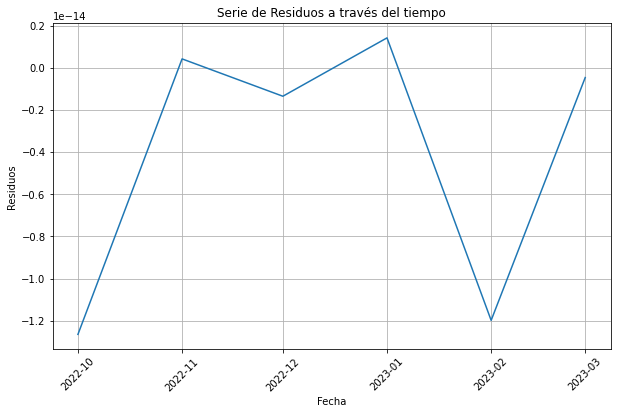

In [20]:
residuos = lm_results.resid

# Graficar la serie de residuos
plt.figure(figsize=(10, 6))
plt.plot(df_tiempo.index, residuos)
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.title('Serie de Residuos a través del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [28]:
def Test(Variable):
    df22101 = pd.read_csv(PATH_2210, delimiter=";", usecols = ['RUT',Variable])
    df22111 = pd.read_csv(PATH_2211, delimiter=";", usecols = ['RUT',Variable])
    df22121 = pd.read_csv(PATH_2212, delimiter=";", usecols = ['RUT',Variable])
    df23011 = pd.read_csv(PATH_2301, delimiter=";", usecols = ['RUT',Variable])
    df23021 = pd.read_csv(PATH_2302, delimiter=";", usecols = ['RUT',Variable])
    df23031 = pd.read_csv(PATH_2303, delimiter=";", usecols = ['RUT',Variable])
    dfvarible22101 = df22101.loc[df22101['RUT'].isin(lista_rut)].dropna()
    dfvarible22111 = df22111.loc[df22111['RUT'].isin(lista_rut)].dropna()
    dfvarible22121 = df22121.loc[df22121['RUT'].isin(lista_rut)].dropna()
    dfvarible23011 = df23011.loc[df23011['RUT'].isin(lista_rut)].dropna()
    dfvarible23021 = df22101.loc[df23021['RUT'].isin(lista_rut)].dropna()
    dfvarible23031 = df23031.loc[df23031['RUT'].isin(lista_rut)].dropna()

    dataframes = [
        (dfvarible22101, '2210'),
        (dfvarible22111, '2211'),
        (dfvarible22121, '2212'),
        (dfvarible23011, '2301'),
        (dfvarible23021, '2302'),
        (dfvarible23031, '2303')
    ]

    dftemporal = pd.DataFrame()

    for df, nombre_df in dataframes:
        dftemporal[nombre_df] = df[Variable]

    dftemporal['RUT'] = df22101['RUT'] 
    dftemporal = dftemporal.dropna()
    TestSeriesDW(dftemporal,2210,2211)
    TestSeriesDW(dftemporal,2211,2212)
    TestSeriesDW(dftemporal,2212,2301)
    TestSeriesDW(dftemporal,2301,2302)
    TestSeriesDW(dftemporal,2302,2303)
    print("---------------------------------------------------------------------------")
    df_tiempo = dftemporal[['2210', '2211', '2212', '2301', '2302', '2303']].copy()
    df_tiempo.columns = pd.to_datetime(df_tiempo.columns, format='%y%m')
    df_tiempo = df_tiempo.T
    TestSeriesBG(df_tiempo)

In [29]:
Test("SPROM")

El test de DW entre las fechas de 2210 y 2211 es de :1.9998191963772067
El test de DW entre las fechas de 2211 y 2212 es de :1.9216297685535972
El test de DW entre las fechas de 2212 y 2301 es de :1.999653676884856
El test de DW entre las fechas de 2301 y 2302 es de :1.999502249981422
El test de DW entre las fechas de 2302 y 2303 es de :1.9994032304652283
---------------------------------------------------------------------------
Valor p: 0.01435790248589915
